In [1]:
# import necessary library and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(12,7)

KeyboardInterrupt: 

### As i download the data mannulay and save it by name `adult.csv`

In [2]:
# reading the data and showing...
df = pd.read_csv('/content/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40.0,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18.0,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40.0,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40.0,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40.0,United-States,<=50K


#### Now this data required cleaning and eda before jumping to the model building part

# DATA CLEANING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24918 entries, 0 to 24917
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             24918 non-null  int64  
 1   workclass       24918 non-null  object 
 2   fnlwgt          24918 non-null  int64  
 3   education       24918 non-null  object 
 4   education.num   24918 non-null  int64  
 5   marital.status  24918 non-null  object 
 6   occupation      24918 non-null  object 
 7   relationship    24918 non-null  object 
 8   race            24918 non-null  object 
 9   sex             24918 non-null  object 
 10  capital.gain    24918 non-null  int64  
 11  capital.loss    24918 non-null  int64  
 12  hours.per.week  24917 non-null  float64
 13  native.country  24917 non-null  object 
 14  income          24917 non-null  object 
dtypes: float64(1), int64(5), object(9)
memory usage: 2.9+ MB


This data have many categorical column also have lots of bad element in side column

In [5]:
# replacing '?' as missing values
df.replace(to_replace='?', value=np.nan, inplace=True)
df.isnull().sum()

age                  0
workclass         1376
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1381
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       1
native.country     450
income               1
dtype: int64

In [8]:
# cchecking the percentage of missing rows to all rows
per = round((1381 / df.shape[0])*100,3)
print(f'The Missing value percentage {per}%')

The Missing value percentage 5.976%


The percentage of null values in total: `5.976 %` Now the rule says i can drop null values row if the percentage is equal to ot lessthat 5%, but here the rule is almost satisfying, also i can't fill those by any fillna methode, the null values are present on the workclass, occupation, and native-country, althoug i can assume the country but the other two will be wron information if i put most-frequnt or other null value methode.

I will just drop those rows.

In [9]:
# droping all the missing values
df.dropna(axis=0, inplace=True)

In [10]:
## keeping a copy of original data
df_original = df.copy()

#### Checking the numerical colums at first, because the categorical column will be encoded in the model creation time. the main problem is dealing with `numerical` columns because these column can contain outliars and bad values

In [11]:
num_df = df.select_dtypes(include=['int64', 'float64'])
num_col = df.select_dtypes(include=['int64', 'float64']).columns
# showing the numerical columns only
num_col

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

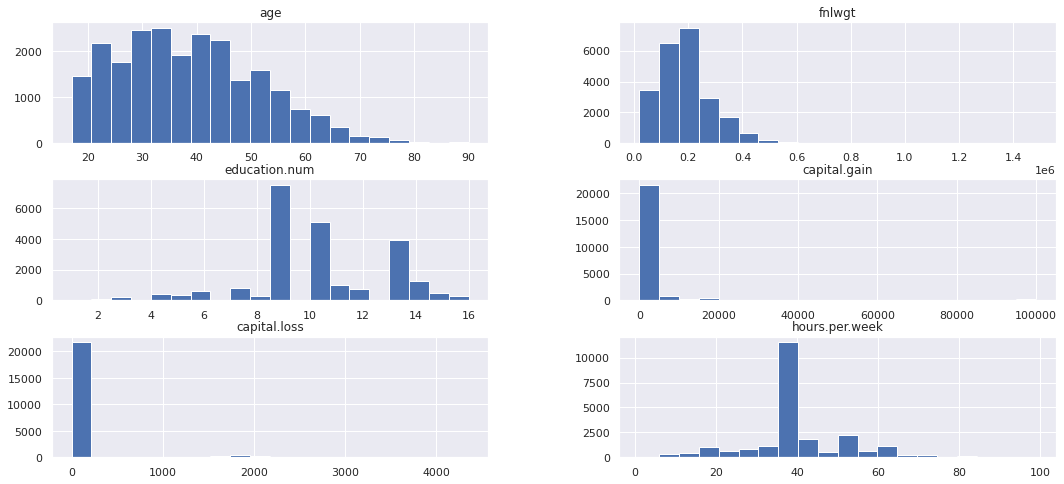

In [12]:
# plotting them together to get ovierviews
# plotting numerical column only
num_df.hist(figsize=(18,8), bins=20);

From this plot we cna see the `capital_loss` and `capital_gain` have most of the values are near zero and it speard to long range.

I have to drop these column as it does not holding any information for the model.

The column `fnlwgt` having very low range values like `o to 1.4`, this will also not be informative when the other values are having very high range of numbers. Droping this column will be better.

And other three column have somewhat normal data. In the data we have a column called education which represent the education of individuals. also having a numerical column called education_num. both contain close same information, It just numerical represent of that column. we can also drop this column.

In [13]:
# descriptive of num df columns
num_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,23108.000000,2.310800e+04,23108.000000,23108.000000,23108.000000,23108.000000
mean,38.688463,1.897118e+05,10.171672,1425.356630,115.349273,41.041804
std,13.187645,1.052101e+05,2.545148,8433.526979,458.524534,11.953017
min,17.000000,1.921400e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177865e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783840e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.377148e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


* `age` - most of the people age are between `20 to 50`
* `fnlwgt` - this column contain very low range of values.
* `education_num` - This column consist of the euducation have for each people in numerical form. 
* `capital.gain`, `capital.loss` - these two column have huge outliears. have to drop these columns
* `hours.per.week` - how much each people works in a week

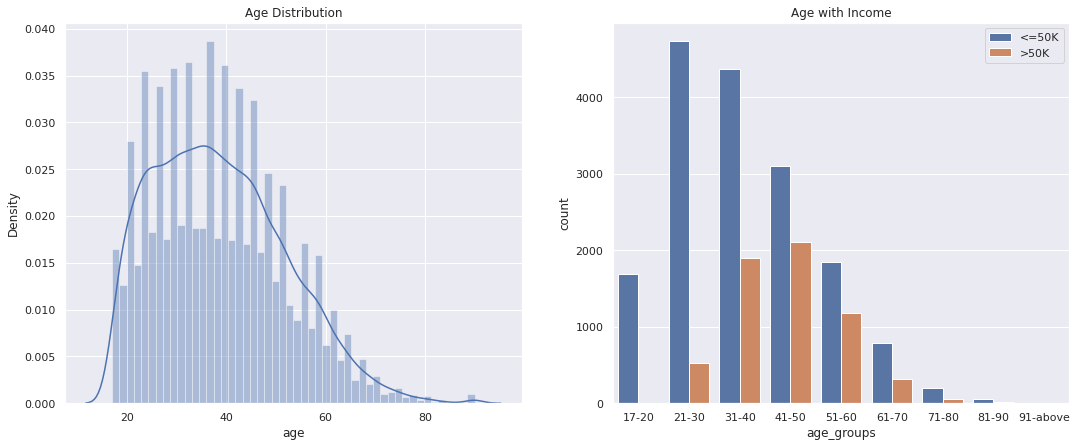

In [14]:
# crating another column for `age` for plotting
# creating `age group` column
age_group = [17, 21, 30, 40,  50, 60, 70, 80, 90,  np.inf]
age_lbl = ['17-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-above']
# creating new column
df['age_groups'] = pd.cut(df['age'], bins=age_group, labels=age_lbl)

# ploting the age group column
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.distplot(df['age']);  # normal age column
plt.title('Age Distribution')
plt.subplot(1,2,2)
sns.countplot(x='age_groups', data=df, hue='income');
plt.title('Age with Income')
plt.legend(loc='upper right');

Most people age are 20 to 50 on the dataset. and the most of people those age are between 40 to 50 are income more than 50k



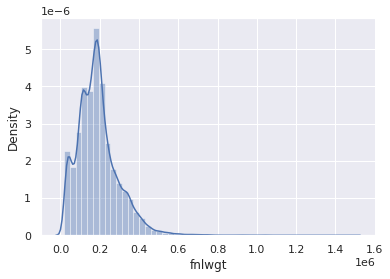

In [15]:
# checking the 'fnlwgt' or final weight column
sns.distplot(df['fnlwgt']);

This fnlwgt column have values upto `1.4` with outliars, the mostof majority of the data is lie under `0.4` as this column has very low value, and also many zero. it will better to drop this column. This column have very smaller range values comare to other values. drop will be better for this.

In [16]:
df.drop('fnlwgt', axis=1, inplace=True)
print('Column droped')

Column droped


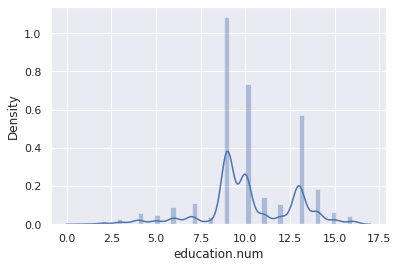

In [17]:
# checking the education.num column
sns.distplot(df['education.num']);

As i have another column which consist similar information, so i will drop this column.

In [18]:
df.drop('education.num', axis=1, inplace=True)
print('column droped')

column droped


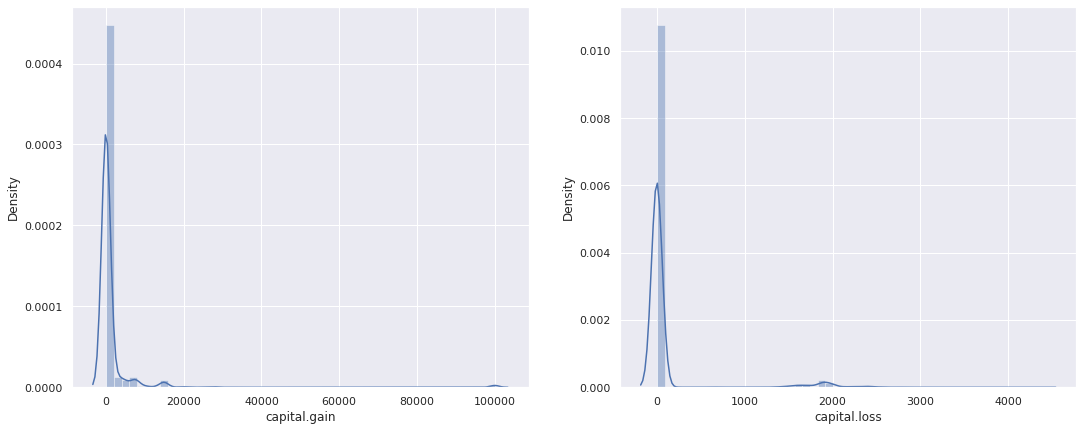

In [19]:
# capital gain and capital loss columns
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.distplot(df['capital.gain']);
plt.subplot(1,2,2)
sns.distplot(df['capital.loss']);

In [20]:
# droping these column
df.drop(['capital.gain', 'capital.loss'], axis=1, inplace=True)
print('Column Droped')

Column Droped


Max hour:  99.0
Min hour:  1.0
Total Hours in a week: 168


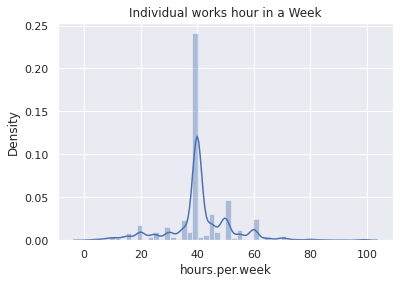

In [21]:
# checking the hours.per.week column
sns.distplot(df['hours.per.week']);
plt.title('Individual works hour in a Week');

# checking the max and min value
print('Max hour: ',df['hours.per.week'].max())
print('Min hour: ',df['hours.per.week'].min())
print(f'Total Hours in a week: {7*24}' )

The value is long tail to right side, adn i can use quantile to remove these value. but for come up that decision, i need further permission. This column will be valueable because the more a person work,it is likely to earn more money.

In [22]:
# find the 99quantile value form hours per week column
q = df['hours.per.week'].quantile(q = 0.99) # it return a single value
q

80.0

Max hour:  78.0
Min hour:  1.0
Total Hours in a week: 168


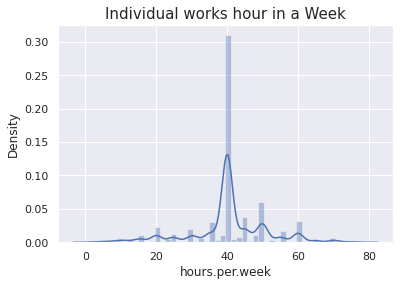

In [23]:
# repleacing this value to dataframe and crearting another dataframe
df1 = df[df['hours.per.week']<q]
# checking the hours.per.week column
sns.distplot(df1['hours.per.week']);
plt.title('Individual works hour in a Week', fontsize=15);

# checking the max and min value
print('Max hour: ',df1['hours.per.week'].max())
print('Min hour: ',df1['hours.per.week'].min())
print(f'Total Hours in a week: {7*24}' )

I have to drop most of numericl columns because most of them having bad data.

### Checking Categorical COlumn

In [24]:
cat_col = df1.select_dtypes(include=['category', 'object']).columns
cat_col

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income',
       'age_groups'],
      dtype='object')

In [25]:
# creating a function to plot category columns
# creating function to plot categorical columns
def cat_plot(col,hue='income'):
    fig, ax1 = plt.subplots(figsize=(20,10))
    graph = sns.countplot(ax=ax1,x=col, data=df1,hue=hue);
    plt.xlabel(col, fontsize=15);
    plt.ylabel('Count', fontsize=15);
    graph.set_xticklabels(graph.get_xticklabels(),rotation=90, fontdict={'fontsize': 15, 
                                                                       'horizontalalignment':'center'});
    for p in graph.patches:
        height = p.get_height();
        graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center",fontdict={'fontsize': 16, 
                                                                       'horizontalalignment':'center'});

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


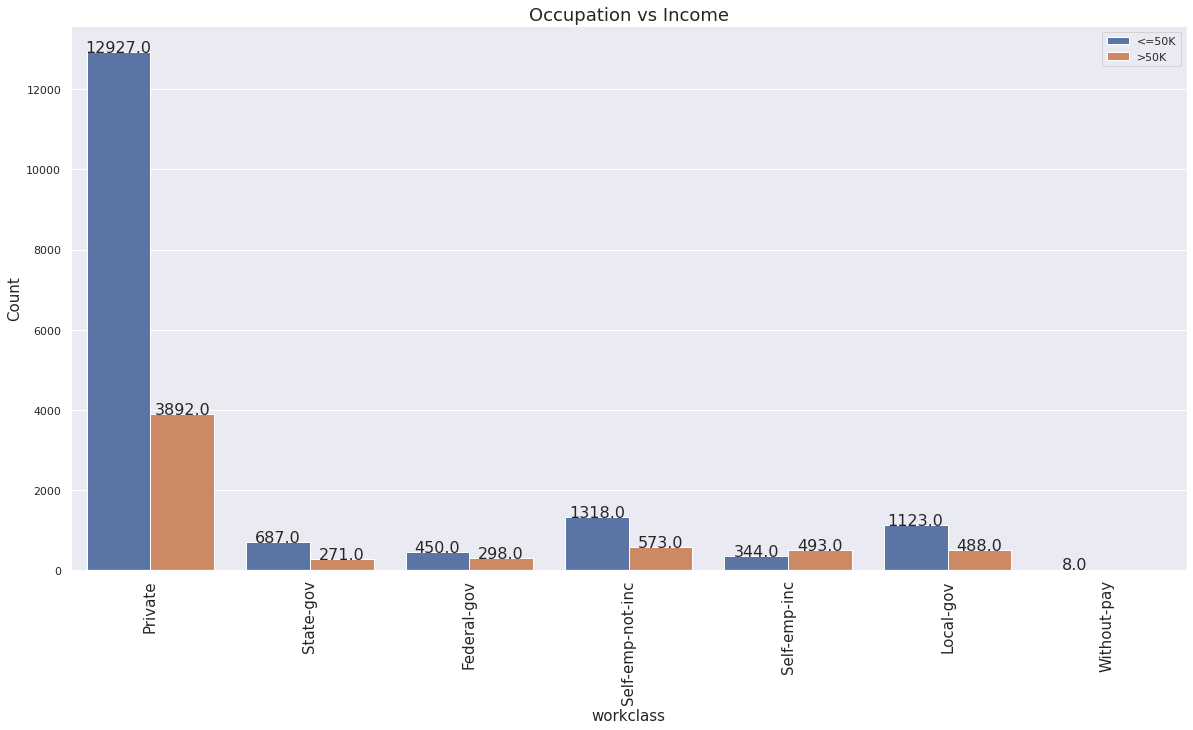

In [26]:
# plotting income vs workclass
cat_plot('workclass')
plt.title('Occupation vs Income', fontsize=18)
plt.legend(loc='upper right');

Most of the people woorks on private in the dtaset. and it look like it have the lowest ratio to earn more than 50k than other sector workclass

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


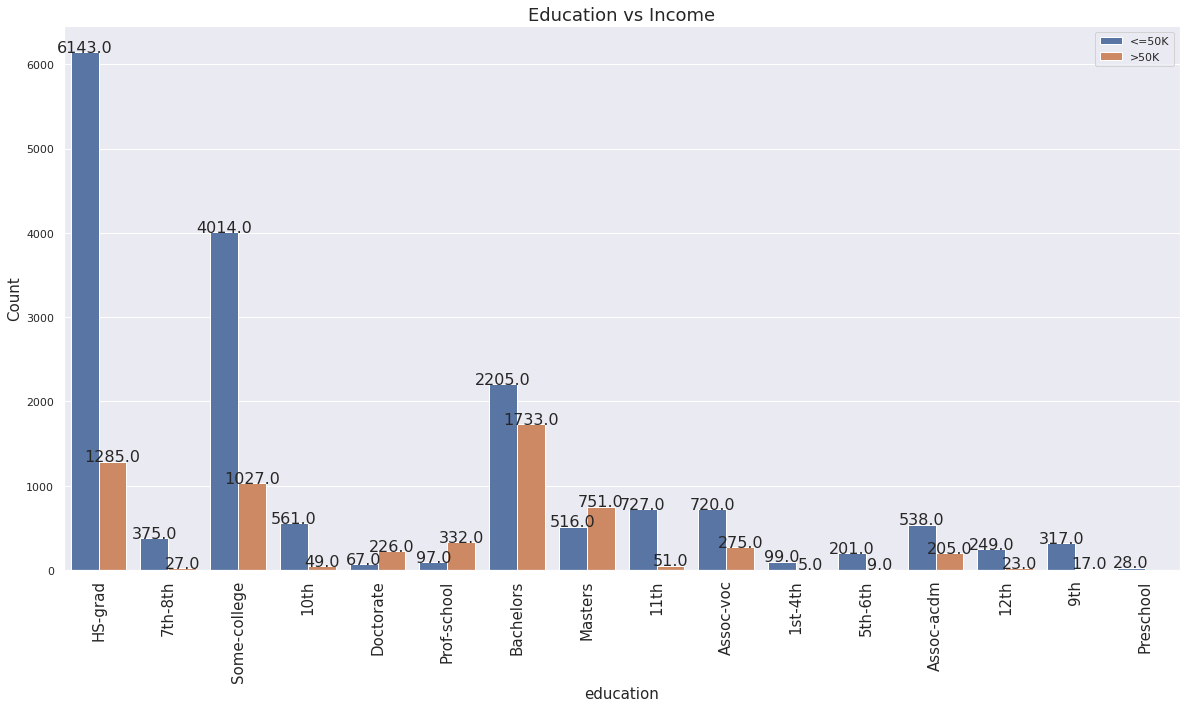

In [27]:
# plotting the 'education' column
cat_plot('education')
plt.title('Education vs Income', fontsize=18)
plt.legend(loc='upper right');

Here the label are too much speard like most of them have similar meaning like HS-grad and 12th, grouping them will provied better result

In [28]:
df1['education'].value_counts()

HS-grad         7428
Some-college    5041
Bachelors       3938
Masters         1267
Assoc-voc        995
11th             778
Assoc-acdm       743
10th             610
Prof-school      429
7th-8th          402
9th              334
Doctorate        293
12th             272
5th-6th          210
1st-4th          104
Preschool         28
Name: education, dtype: int64

In [29]:
# creating function to replace the similar qualification 
def edu_rep(text):
    school = ['HS-grad', '11th', '10th', '7th-8th', '9th', '12th', '5th-6th', '1st-4th', 'Preschool']
    college = ['Some-college','Bachelors','Prof-school']
    master = ['Masters', 'Doctorate']
    associ = ['Assoc-voc', 'Assoc-acdm']
    # checking the value that is inside of edu list
    if text in school:
        return 'School Level'
    elif text in college:
        return 'College Level'
    elif text in master:
        return 'Masters'
    elif text in associ:
        return 'Associate'
    
    
# applying the function and making another column
df1['Education Level'] = df1['education'].apply(lambda x: edu_rep(x))

# comparing both of column that it workd right
df1[['education', 'Education Level']]

,education,Education Level
1,HS-grad,School Level
3,7th-8th,School Level
4,Some-college,College Level
5,HS-grad,School Level
6,10th,School Level
...,...,...
24912,12th,School Level
24913,7th-8th,School Level
24914,Assoc-voc,Associate
24915,Bachelors,College Level


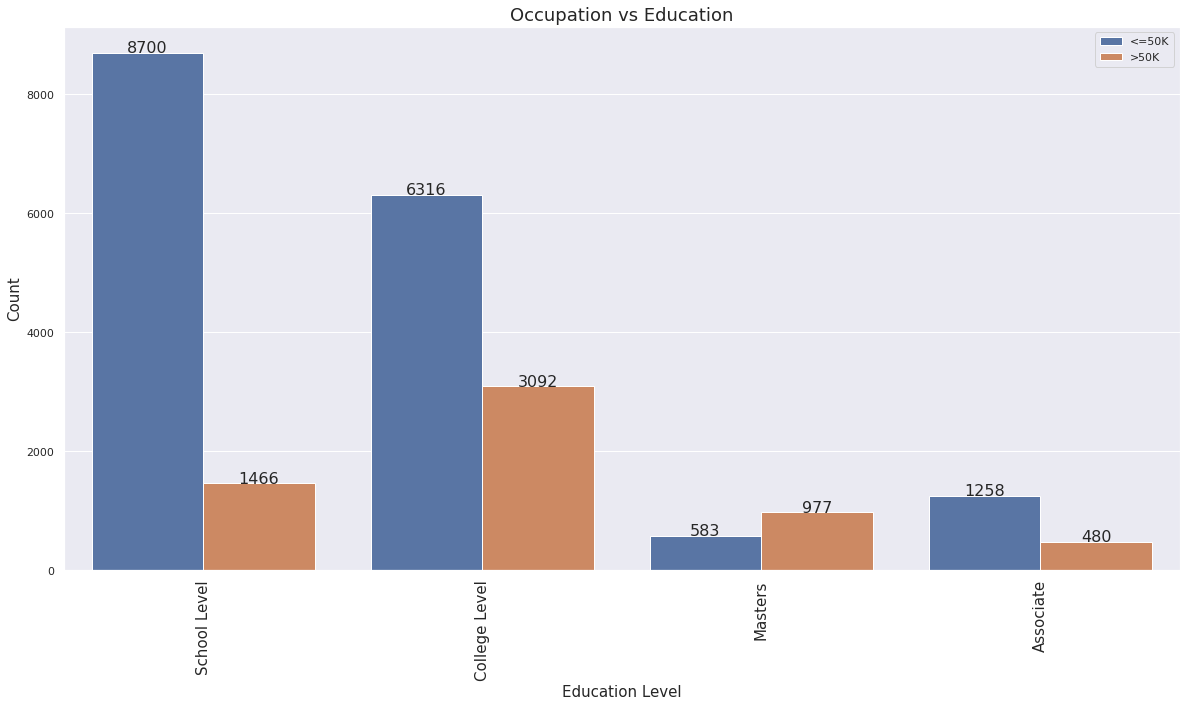

In [30]:
# potting again
cat_plot('Education Level', hue='income');
plt.title('Occupation vs Education', fontsize=18);
plt.legend(loc='upper right');

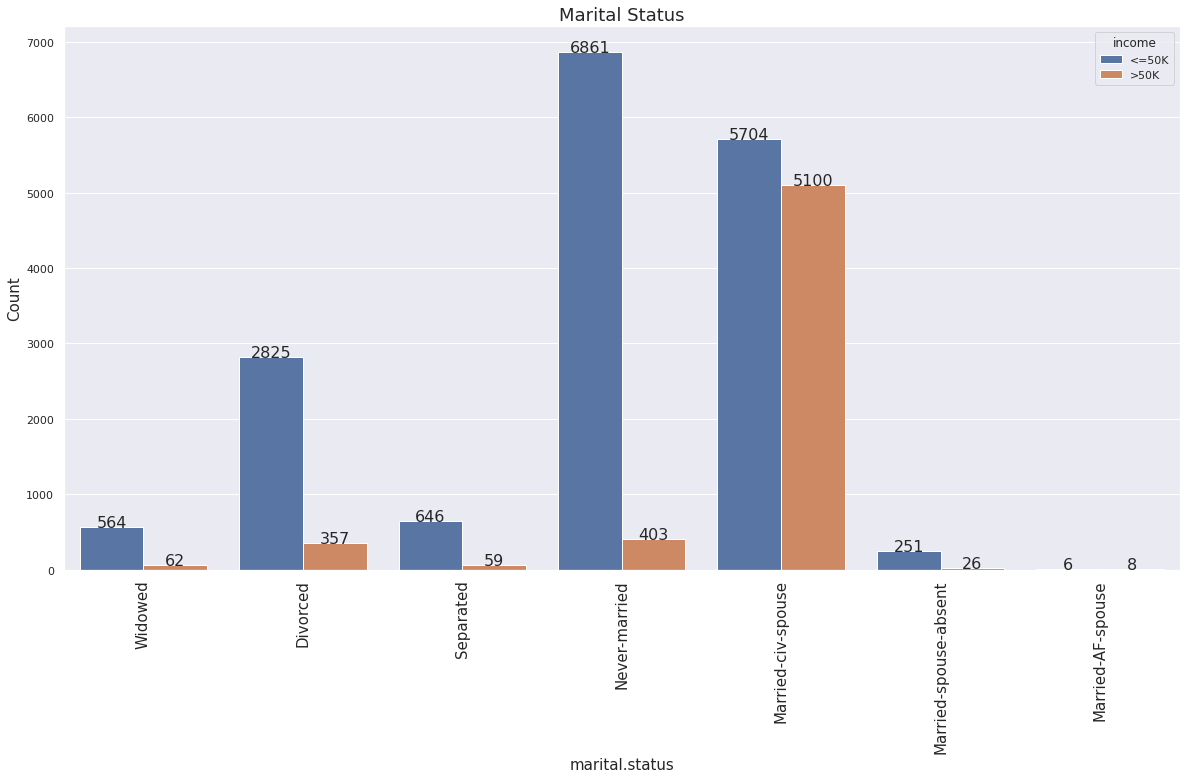

In [31]:
# checking 'marital.status' column
cat_plot('marital.status')
plt.title('Marital Status', fontsize=18);

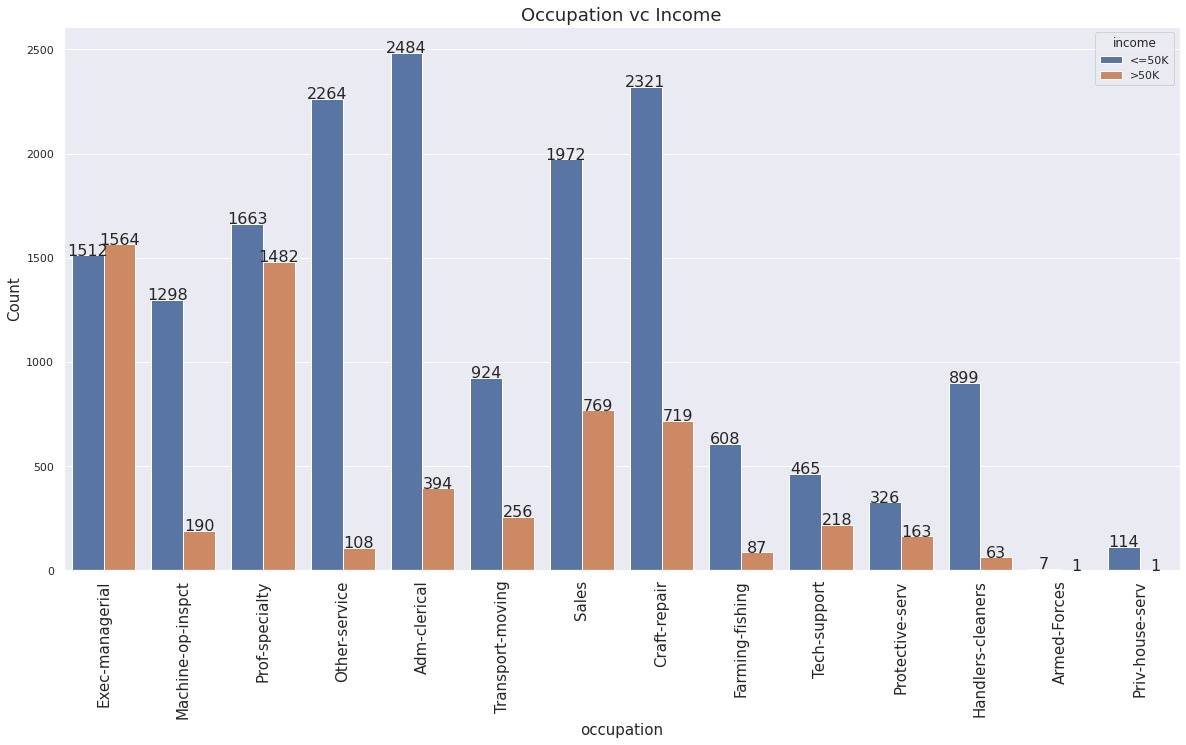

In [32]:
# checking the 'occupation' column
cat_plot('occupation')
plt.title('Occupation vc Income', fontsize=18);

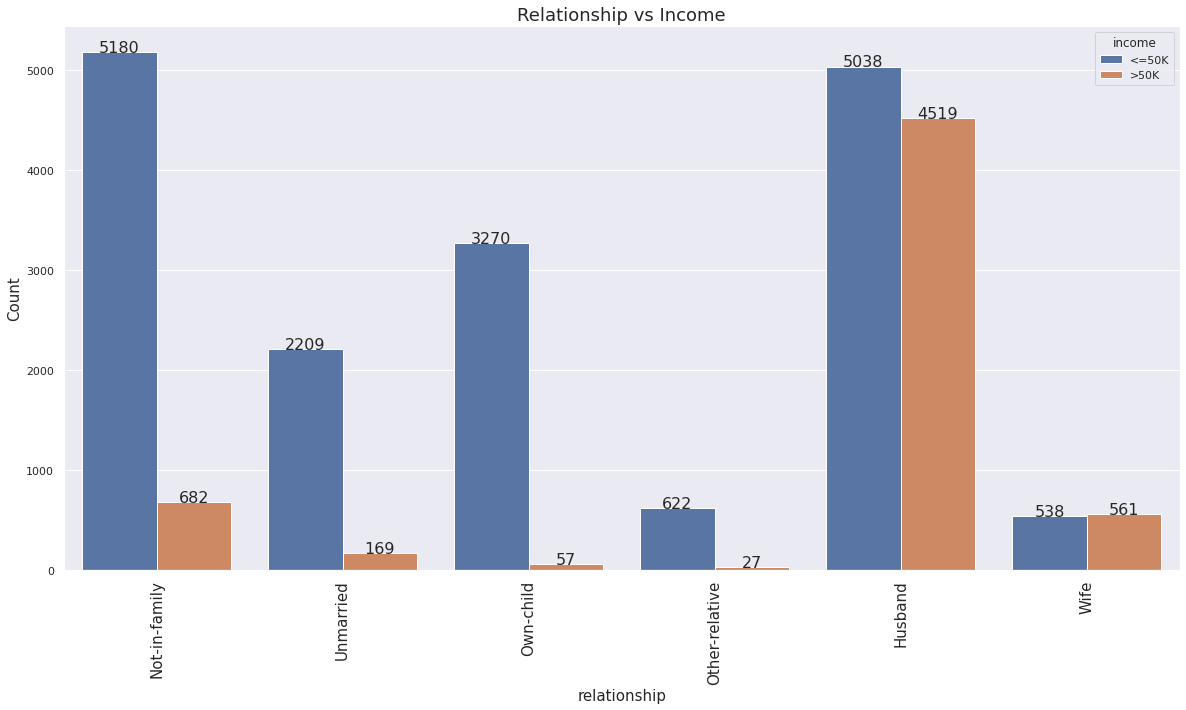

In [33]:
# checking 'relationship' column
cat_plot('relationship')
plt.title('Relationship vs Income', fontsize=18);

In gnerelar sence the relationship is not holding any information for their income. Only it is proven that husband or male and wife or female are earning same ammount. from last two bar.

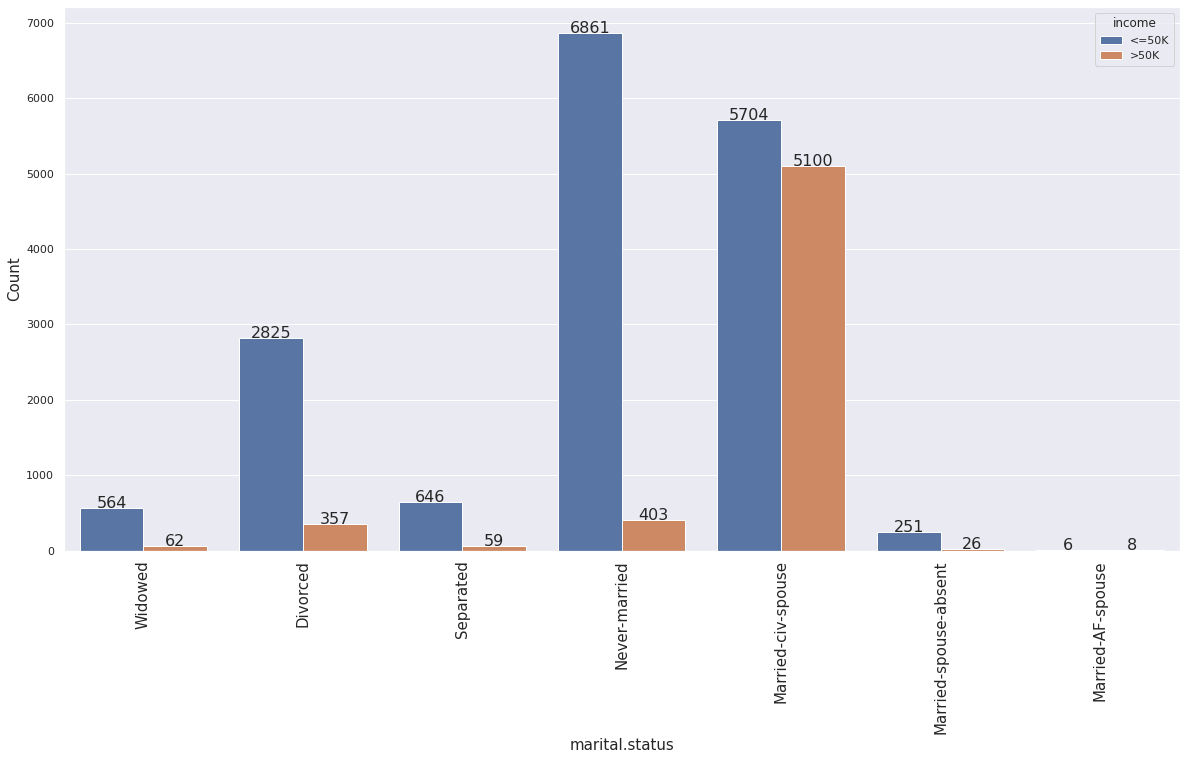

In [34]:
cat_plot('marital.status')

As this column is not effecting that much on the income, also the variation is very far, so i will drop this column

In [35]:
df1.drop('marital.status', axis=1, inplace=True)

Same with relationship 

In [36]:
df1.drop('relationship', axis=1, inplace=True)
print('column droped')

column droped


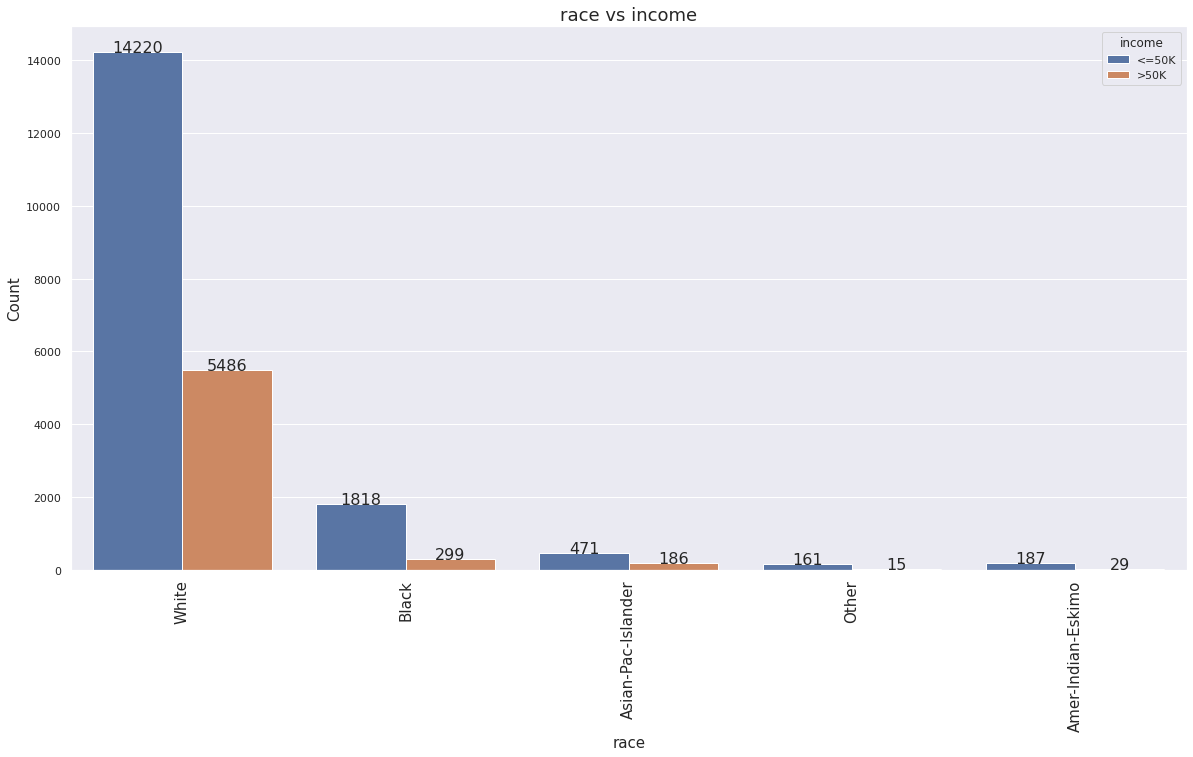

In [37]:
# checking the race column
cat_plot('race')
plt.title('race vs income', fontsize=18);

most of them are white so droping this column will be better.

In [38]:
df1.drop('race', axis=1, inplace=True)
print('column dropped')

column dropped


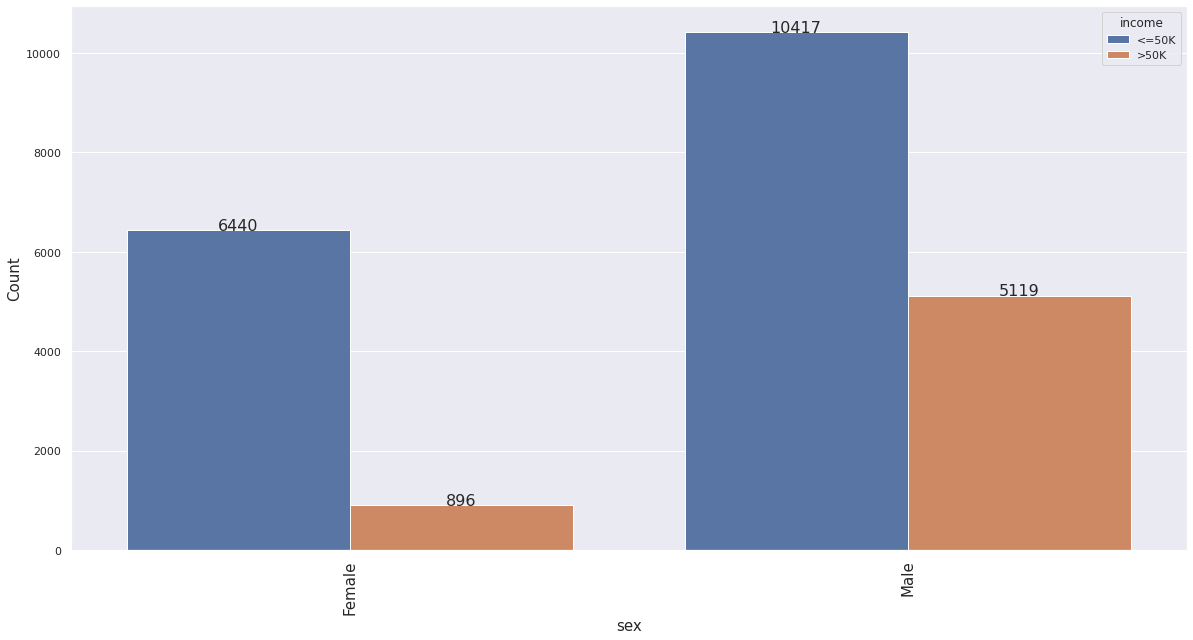

In [39]:
# seeing the sex column
cat_plot('sex', hue='income')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


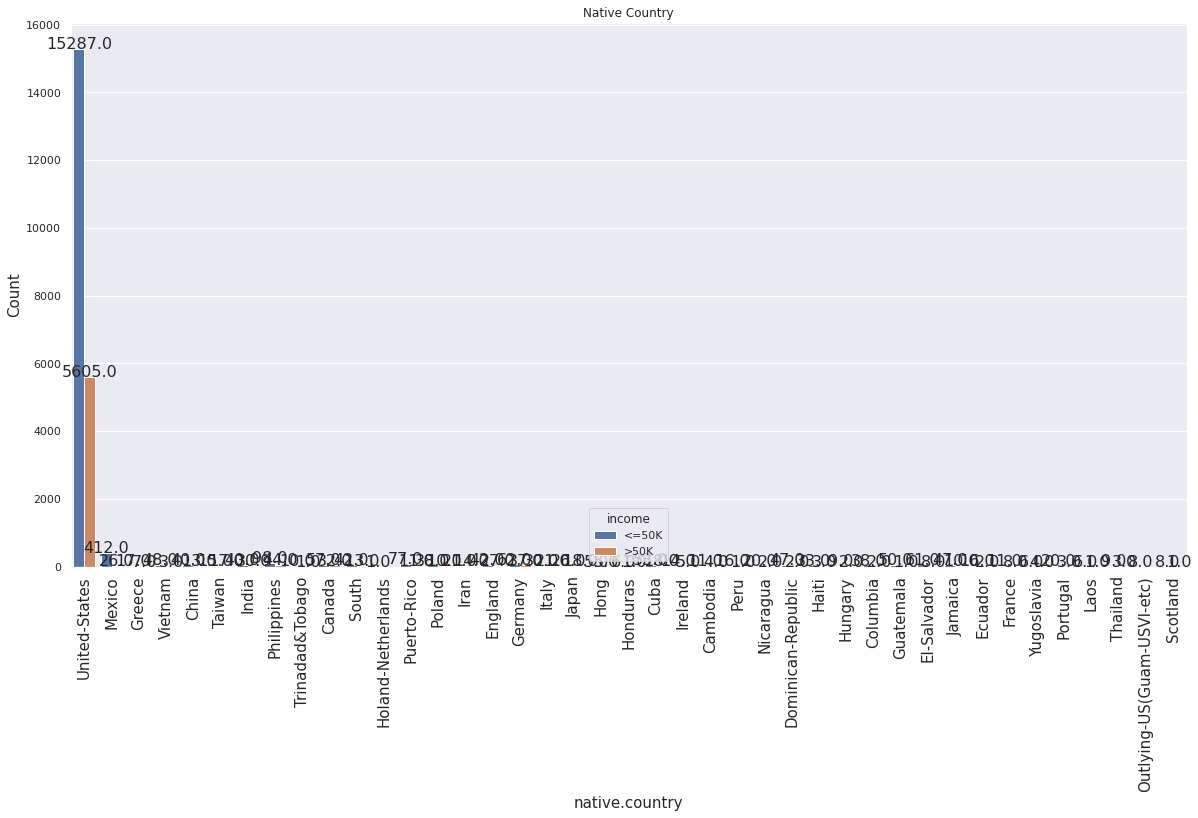

In [40]:
# cat_plot for country
cat_plot('native.country')
plt.title('Native Country');

In [41]:
# majority is on USA.
df1.drop('native.country', axis=1, inplace=True)
print('Droped')

Droped


Now i have drope all unnecessary column, chek the what i left

In [42]:
df1.head()

,age,workclass,education,occupation,sex,hours.per.week,income,age_groups,Education Level
1,82,Private,HS-grad,Exec-managerial,Female,18.0,<=50K,81-90,School Level
3,54,Private,7th-8th,Machine-op-inspct,Female,40.0,<=50K,51-60,School Level
4,41,Private,Some-college,Prof-specialty,Female,40.0,<=50K,41-50,College Level
5,34,Private,HS-grad,Other-service,Female,45.0,<=50K,31-40,School Level
6,38,Private,10th,Adm-clerical,Male,40.0,<=50K,31-40,School Level


In [43]:
# droping the education column
df1.drop('education', axis=1, inplace=True)

In [44]:
# checking the balance of target column
df1['income'].value_counts()

<=50K    16857
>50K      6015
Name: income, dtype: int64

In [45]:
# encoding the target column
df1['income_enc'] = df1['income'].map({"<=50K":0, ">50K":1})
df1.head()

,age,workclass,occupation,sex,hours.per.week,income,age_groups,Education Level,income_enc
1,82,Private,Exec-managerial,Female,18.0,<=50K,81-90,School Level,0
3,54,Private,Machine-op-inspct,Female,40.0,<=50K,51-60,School Level,0
4,41,Private,Prof-specialty,Female,40.0,<=50K,41-50,College Level,0
5,34,Private,Other-service,Female,45.0,<=50K,31-40,School Level,0
6,38,Private,Adm-clerical,Male,40.0,<=50K,31-40,School Level,0


In [46]:
# droping the old target column
df1.drop('income', axis=1, inplace=True)

In [47]:
# checking describe for last time before jumping to model building part
df1.describe(include='all')

,age,workclass,occupation,sex,hours.per.week,age_groups,Education Level,income_enc
count,22872.000000,22872,22872,22872,22872.000000,22636,22872,22872.000000
unique,NaN,7,14,2,NaN,8,4,NaN
top,NaN,Private,Prof-specialty,Male,NaN,31-40,School Level,NaN
freq,NaN,16819,3145,15536,NaN,6176,10166,NaN
mean,38.664524,NaN,NaN,NaN,40.560467,NaN,NaN,0.262985
std,13.199523,NaN,NaN,NaN,11.000070,NaN,NaN,0.440264
min,17.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.000000
25%,28.000000,NaN,NaN,NaN,40.000000,NaN,NaN,0.000000
50%,37.000000,NaN,NaN,NaN,40.000000,NaN,NaN,0.000000
75%,47.000000,NaN,NaN,NaN,45.000000,NaN,NaN,1.000000


In [48]:
df1.dtypes

age                   int64
workclass            object
occupation           object
sex                  object
hours.per.week      float64
age_groups         category
Education Level      object
income_enc            int64
dtype: object

# Model Building Part

In [49]:
# getting category for categoricla value
df2 = pd.get_dummies(data = df1, drop_first=True)

# checking the shape after categorical encoding
df2.shape

(22872, 34)

In [50]:
## getting X and y adn train and test data
X = df2.drop('income_enc', axis=1)
y = df2['income_enc']



In [51]:
# scaling the data
from sklearn.preprocessing import StandardScaler

# creating instance of Standerd scaler
scl = StandardScaler()

X_scl = scl.fit_transform(X)  # scaling the X

X_scl

array([[ 3.28318105, -2.05098327, -0.27526813, ..., -0.83591401,
        -0.27055166,  1.117968  ],
       [ 1.16184586, -0.05095233, -0.27526813, ..., -0.83591401,
        -0.27055166,  1.117968  ],
       [ 0.17694024, -0.05095233, -0.27526813, ...,  1.1962953 ,
        -0.27055166, -0.89447999],
       ...,
       [-0.5049175 , -0.05095233, -0.27526813, ..., -0.83591401,
        -0.27055166, -0.89447999],
       [-0.27763158,  0.40360016, -0.27526813, ...,  1.1962953 ,
        -0.27055166, -0.89447999],
       [-0.80796538, -0.05095233, -0.27526813, ...,  1.1962953 ,
        -0.27055166, -0.89447999]])

In [52]:
# importing traintestsplit
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scl, y, test_size=0.2)

# checking the shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18297, 33), (4575, 33), (18297,), (4575,))

In [53]:
# importing XGBoostClassifier

from xgboost import XGBClassifier

xgb = XGBClassifier() # leave default hyperparameter

# fit with train data

xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [55]:
# checking perfoemance
from sklearn.metrics import f1_score, confusion_matrix

f1_score(y_test, xgb.predict(X_test))

0.5574912891986062

In [56]:
confusion_matrix(y_test, xgb.predict(X_test))

array([[3126,  263],
       [ 626,  560]])

### Now the base model did not give any good result, it have only 0.55 f1 score, my model is working bad when predicting the row have lower 50k income

In [57]:
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [59]:
# going for hyperparameter tuning
params = {
 'booster': ['gbtree', 'dart'],
 'colsample_bytree': [0.3,0.5,0.8,1],
 'gamma': [0,0.1,0.2,0.3,0.5],
 'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_delta_step': [0,2,5,8],
 'max_depth': [3,5,8,10,15],
 'n_estimators': [100,150,200],
 'n_jobs': [-1],
}

# creating instance og xgb
xgb2 = XGBClassifier(n_jobs=-1)

# importing randomized search cv
from sklearn.model_selection import RandomizedSearchCV
xgb_rnd_grid = RandomizedSearchCV(estimator=xgb2, param_distributions=params,
                                  n_iter=20, cv=3, scoring='f1',
                                  verbose=9, n_jobs=-1)

In [60]:
# fitting with train data
xgb_rnd_grid.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  5.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, s...
                   param_distributions={'booster': ['gbtree', 'dart'],
                                        'colsample_bytree': [0.3, 0.5, 0.8, 1],
                          

In [61]:
xgb_rnd_grid.best_score_

0.5735363111652706

In [66]:
f1_score(y_test, xgb_rnd_grid.predict(X_test))

0.5696263949539059

In [67]:
confusion_matrix(y_test, xgb_rnd_grid.predict(X_test))

array([[3101,  288],
       [ 599,  587]])

In [62]:
xgb_rnd_grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.5,
              learning_rate=0.2, max_delta_step=5, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [65]:
# again perform gridsearch cv for neighbour hyperparameter of best form Randomized grid

params_grid = {
 'booster': ['gbtree'],
 'gamma': [0.5, 0.8,1],
 'learning_rate': [0.15,0.20,0.25,],
 'max_delta_step': [4,5,6],
 'max_depth': [3,5,6],
 'n_estimators': [100,150,180],
 'n_jobs': [-1],
}


# creating instance og xgb
xgb3 = XGBClassifier(n_jobs=-1)

# importing randomized search cv
from sklearn.model_selection import GridSearchCV
xgb_grid1 = GridSearchCV(estimator=xgb2, param_grid=params_grid,
                                  cv=3, scoring='roc_auc',
                                  verbose=9, n_jobs=-1)

In [68]:
# fitting the data
xgb_grid1.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed: 14

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'booster': ['gbtree'], 'gamma': [0.5, 0.8, 1],
                         'learning_rate': [0.15, 0.2, 0.25],
                         'max_delta_step': [4

In [69]:
xgb_grid1.best_score_

0.8415174953412804

In [71]:
confusion_matrix(y_test, xgb_grid1.predict(X_test))

array([[3119,  270],
       [ 621,  565]])

### Now from above grid search am etting 0.84 roc_auc, score, and that is little good. and am stopping the algorithme here.